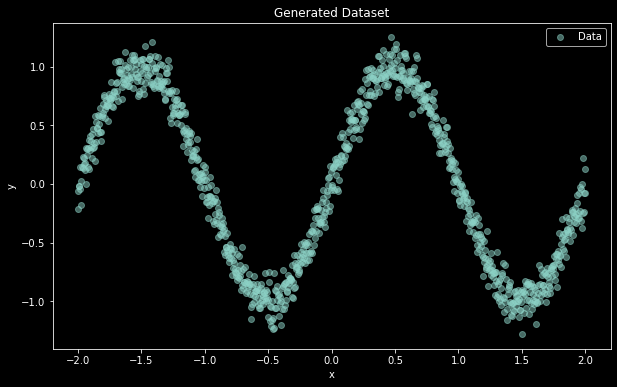

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R^2 Score: 0.9768310252663397


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score

# Generate dataset
nPts = 1000
x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# Define the target function with noise
y = np.sin(2 * np.pi * x / 2) + np.random.normal(0, 0.1, nPts)

# Plot dataset
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', alpha=0.5)
plt.title("Generated Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Define parameter grid for RandomForestRegressor
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=kf,
    scoring=make_scorer(r2_score),
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X, y)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)
